In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import sys
import os

sys.path.append(os.path.abspath("../src"))

from scheduler.stochastic_source import StochasticSource, IID, Discrete, AR1, ColoredNoise
from scheduler.task_models import Task, PeriodicTask
from scheduler.processor import Uniprocessor
from scheduler.supplementary import PlotManager, get_periodic_tasks_hyperperiod, add_hyperperiod_lines

// *no jitter unless specified explicitly*

# Demo for deterministic model

In [2]:
taskload = [
  PeriodicTask(name="T1", period=20, priority=1, base_execution_time=5), 
  PeriodicTask(name="T2", offset=2, period=5, priority=1, base_execution_time=3, relative_deadline=4),
  PeriodicTask(name="T3", period=20, priority=1, base_execution_time=1)
]

In [3]:
interval = 50

P = Uniprocessor(policy="FIFO", taskload=taskload)
WL = P.get_workload_until(interval)
T = get_periodic_tasks_hyperperiod(taskload)
PM = PlotManager(WL)
myfig = PM.plot_backlog()
add_hyperperiod_lines(myfig, T, interval)
myfig.show()

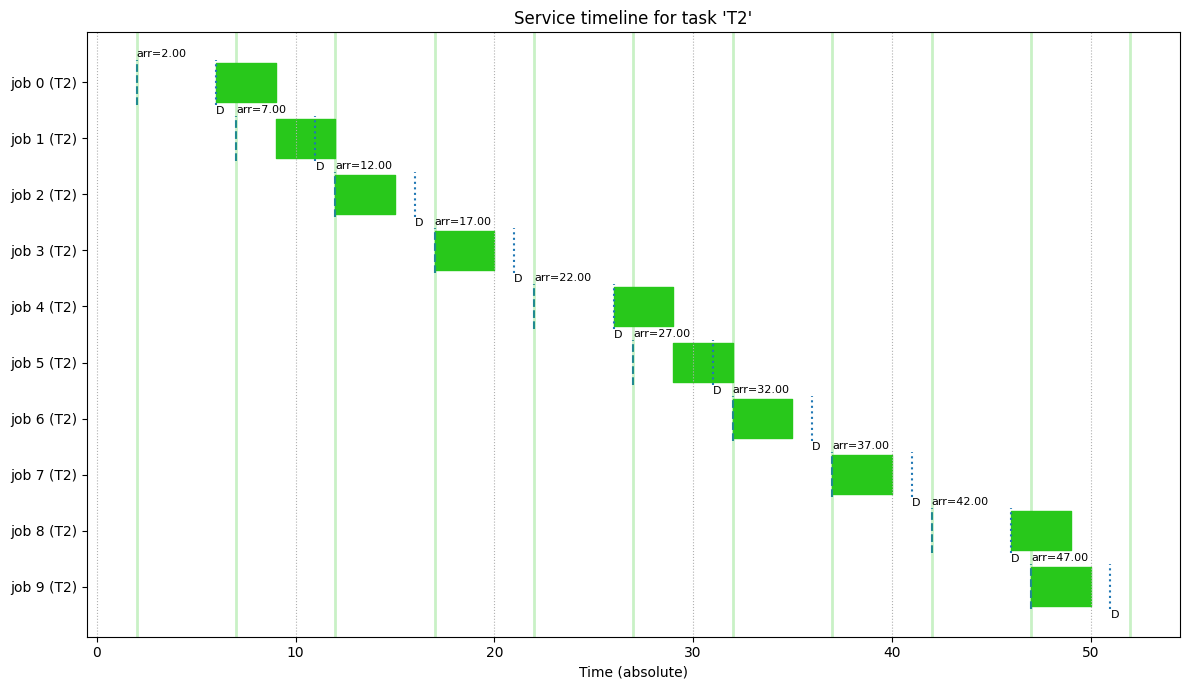

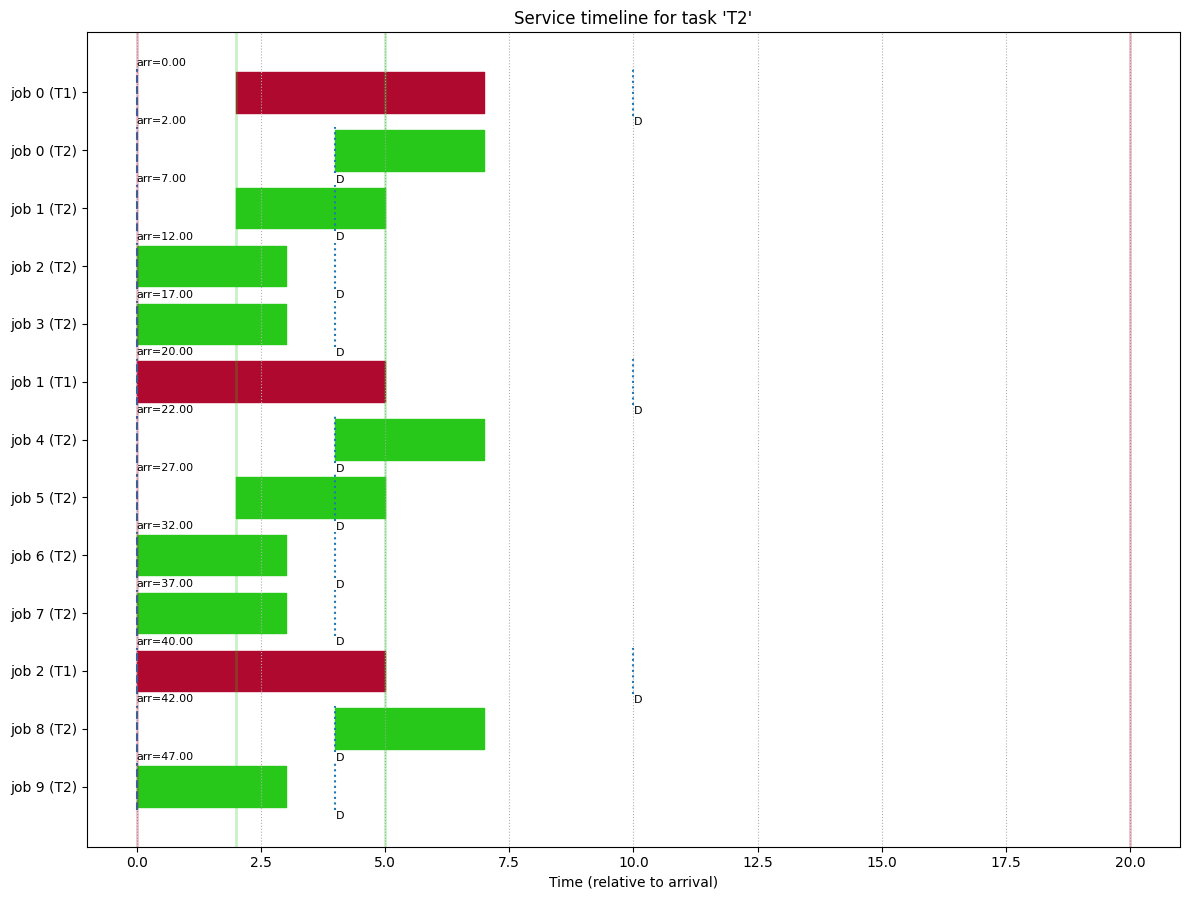

In [4]:
PM.plot_task_timeline(tasks_names_reference=["T2"], relative_to_arrival=False, sort_reverse=True)
PM.plot_task_timeline(tasks_names_reference=["T1", "T2"], relative_to_arrival=True, sort_reverse=True)  

# Demo for auto-regressive execution time model 

$$
C_{j,i} = C_{theoretical} + \varepsilon_{j,i}\\
\varepsilon_{j,i} = \rho \cdot \varepsilon_{j,i-1} + \eta_{j,i}\\

$$

## AR1 model

- no noise in AR1 sampling
- different AR1 for jitter and execution time


In [5]:
taskload = [
  PeriodicTask(
    name="T1", 
    offset=0, 
    period=5, 
    priority=1, 
    base_execution_time=3, 
    relative_deadline=4, 
    execution_deviation_distribution=AR1(rho=0.7, x0=2, noise=None),
    jitter_distribution=AR1(rho=1.3, x0=1, noise=None),
  ),
]

In [6]:
interval = 50

P = Uniprocessor(policy="FIFO", taskload=taskload)
WL = P.get_workload_until(interval)
T = get_periodic_tasks_hyperperiod(taskload)
PM = PlotManager(WL)
myfig = PM.plot_backlog()
myfig.show()

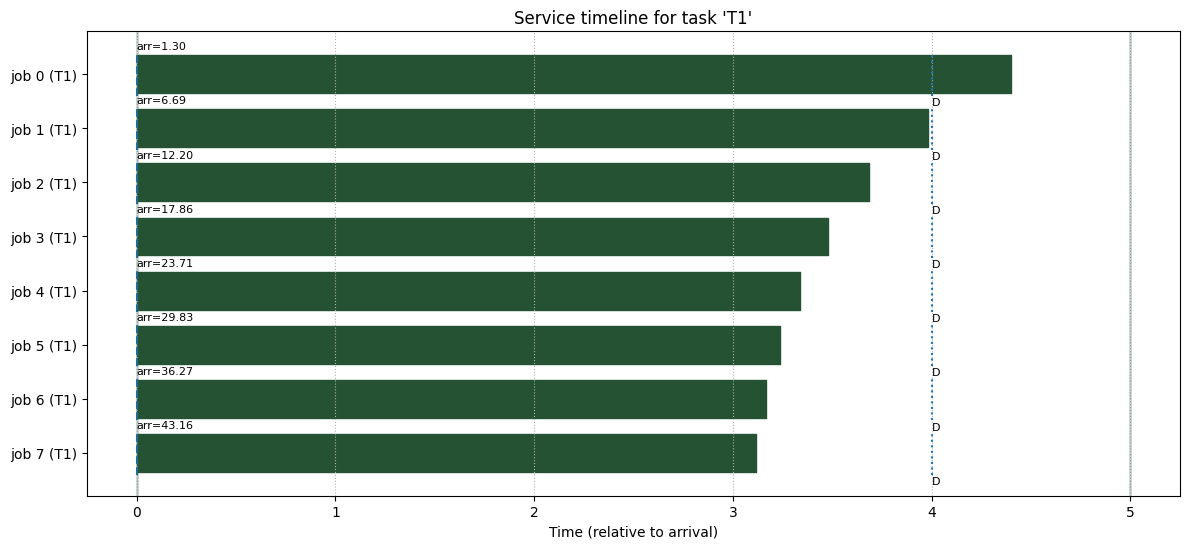

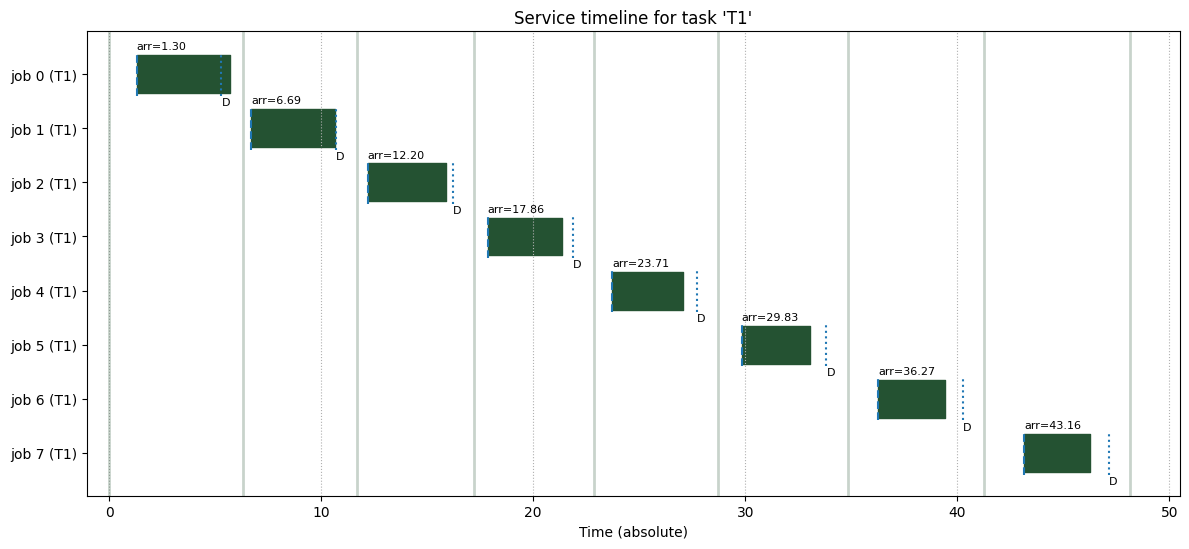

In [7]:
PM.plot_task_timeline(tasks_names_reference=["T1"], relative_to_arrival=True, sort_reverse=True)
PM.plot_task_timeline(tasks_names_reference=["T1"], relative_to_arrival=False, sort_reverse=True)

# Pink noise for execution times

In [28]:
taskload = [
  PeriodicTask(
    name="T1", 
    offset=0, 
    period=5, 
    priority=1, 
    base_execution_time=3, 
    relative_deadline=4, 
    execution_deviation_distribution=ColoredNoise(alpha=1, mean=0, std=0.5),
    jitter_distribution=None,
  ),
]

In [29]:
interval = 50

P = Uniprocessor(policy="FIFO", taskload=taskload)
WL = P.get_workload_until(interval)
T = get_periodic_tasks_hyperperiod(taskload)
PM = PlotManager(WL)
myfig = PM.plot_backlog()
myfig.show()

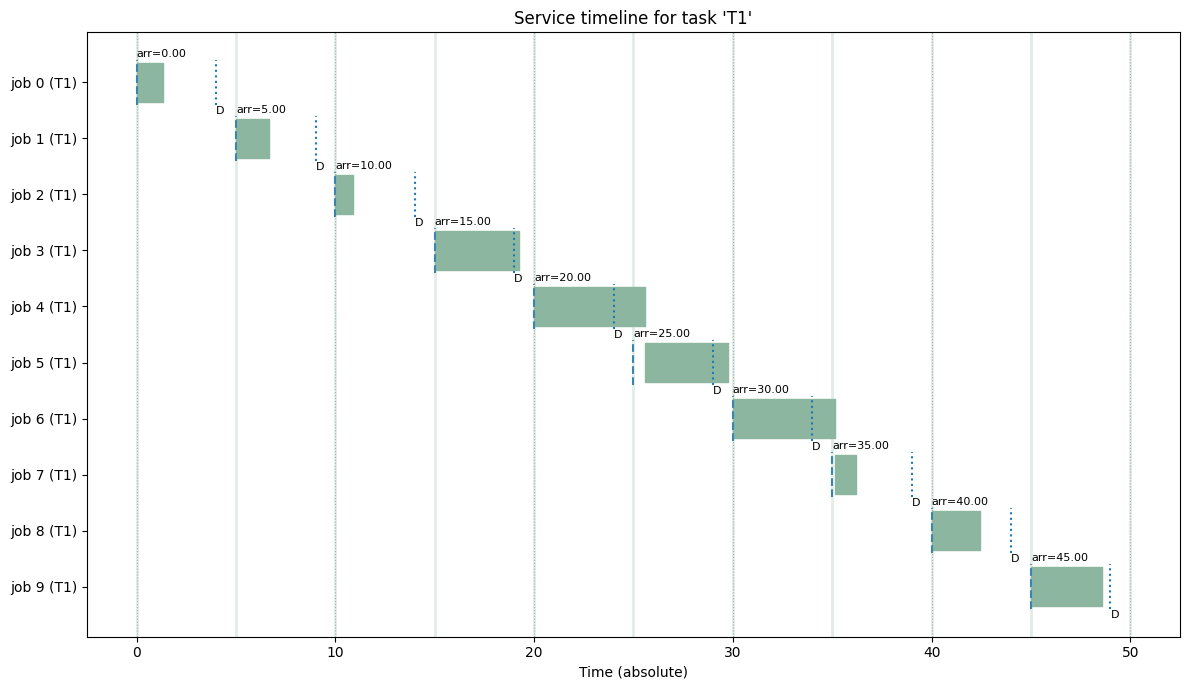

In [30]:
PM.plot_task_timeline(tasks_names_reference=["T1"], relative_to_arrival=False, sort_reverse=True)

# Discrete distribution for execution times and jitters

In [31]:
taskload = [
  PeriodicTask(
    name="T1", 
    offset=0, 
    period=5, 
    priority=1, 
    base_execution_time=3, 
    relative_deadline=4, 
    execution_deviation_distribution=Discrete({0: 0.3, 1: 0.5, 5: 0.2}),
    jitter_distribution=Discrete({0: 0.3, 0.5: 0.5, 1: 0.2}),
  ),
]

In [32]:
interval = 50

P = Uniprocessor(policy="FIFO", taskload=taskload)
WL = P.get_workload_until(interval)
T = get_periodic_tasks_hyperperiod(taskload)
PM = PlotManager(WL)
myfig = PM.plot_backlog()
myfig.show()

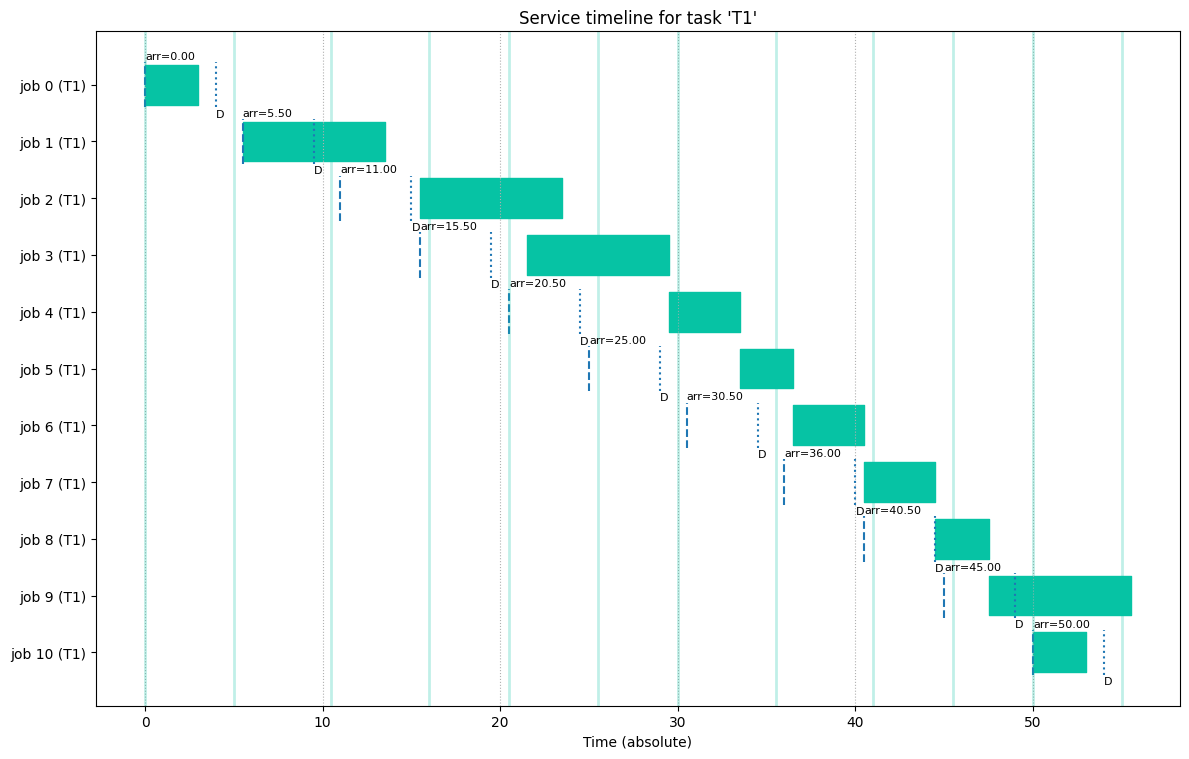

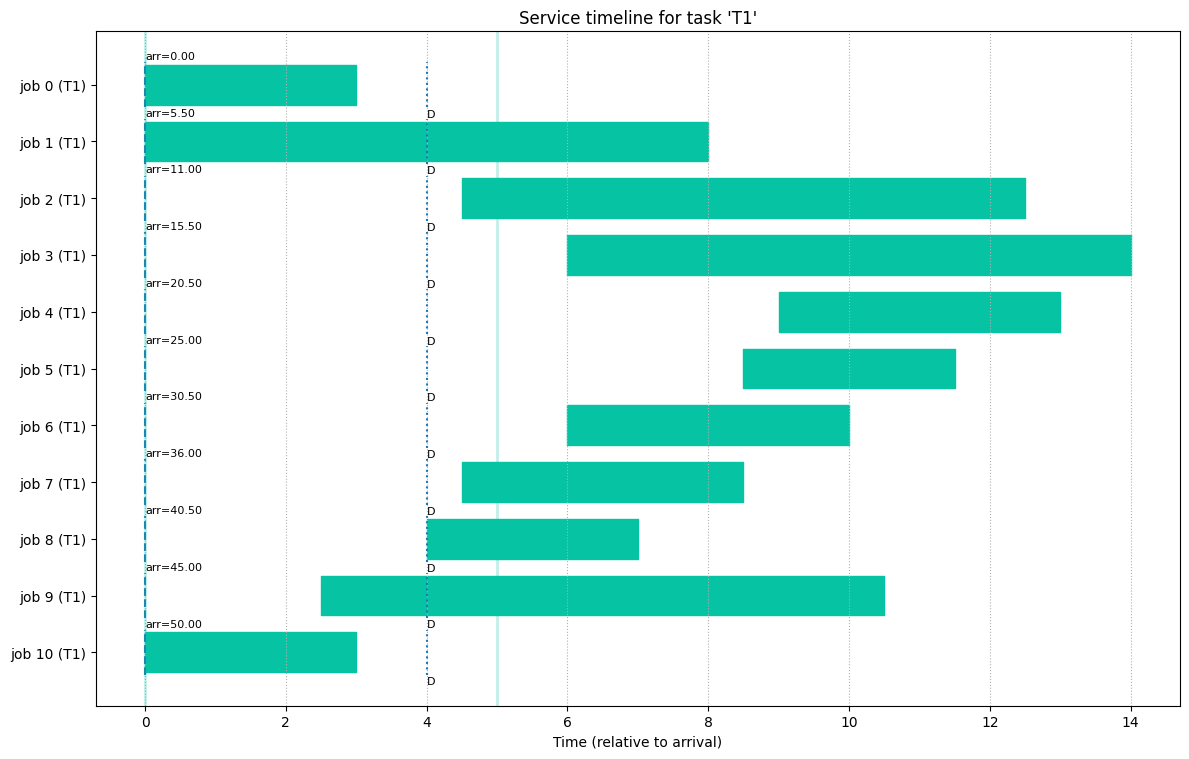

In [33]:
PM.plot_task_timeline(tasks_names_reference=["T1"], relative_to_arrival=False, sort_reverse=True)
PM.plot_task_timeline(tasks_names_reference=["T1"], relative_to_arrival=True, sort_reverse=True)